In [1]:
import copy as cp
import numpy as np
np.bool = np.bool_
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import pyemma.plots as mplt
import pyemma.coordinates as coor
import pyemma
import sklearn as skl
import sys
from tqdm import tqdm

In [2]:
import sys

In [3]:
sys.path.append('../../../0_python_modules/')

In [4]:
import extras
import navjeet_hist as nh

In [6]:
randoms = np.loadtxt('../../../1_datasets/randoms.txt', dtype=int)

In [7]:
fsupervised = []
isupervised = []
for i in range(len(randoms)):
    fimp = np.load(f'saved_clf_all/fimp_all_{i}.npy')
    fsupervised.append( fimp )
    isupervised.append(fimp.argsort()[::-1])
fsupervised = np.array(fsupervised)
isupervised = np.array(isupervised)

In [8]:
fpermute = []
ipermute = []
for h in range(2,11):
    ff = []
    ii=[]
    for i in range(len(randoms)):
        fimp = np.load(f'saved_urf_all/fimp_hlabel{h}_{i}.npy')
        ff.append( fimp )
        ii.append(fimp.argsort()[::-1])
    fpermute.append(ff)
    ipermute.append(ii)
fpermute = np.array(fpermute)
ipermute = np.array(ipermute)

In [9]:
frandom = []
irandom = []
for i in randoms:
    np.random.seed(i)
    ff = np.random.random(size=fsupervised.shape[1])
    ff = ff/ff.sum()
    frandom.append(ff)
    irandom.append(ff.argsort()[::-1])
frandom = np.array(frandom)
irandom = np.array(irandom)

In [10]:
fsame = np.zeros((9,fsupervised.shape[-1],2)) # n_features common in permute to supervised
wpsame = np.zeros((9,fsupervised.shape[-1],2)) # cum fimp of common wrt permute
wssame = np.zeros((9,fsupervised.shape[-1],2)) # cum fimp of common wrt supervised
for h in range(2,11):
    for f in range(1,fsupervised.shape[-1]+1):
        ss = []
        wp = []
        ws = []
        for i in range(len(randoms)):
            fp = ipermute[h-2,i][:f]
            for j in range(len(randoms)):
                fs = isupervised[j][:f]
                cc = np.intersect1d(fp,fs)
                ss.append(cc.shape[0])
                wp.append( fpermute[h-2,i][cc].sum() / fpermute[h-2,i][fp].sum() )
                ws.append( fsupervised[j][cc].sum() / fsupervised[j][fs].sum() )
        fsame[h-2,f-1] = [np.mean(ss), np.std(ss)]
        wpsame[h-2,f-1] = [np.mean(wp), np.std(wp)]
        wssame[h-2,f-1] = [np.mean(ws), np.std(ws)]

In [11]:
rsame_sup = np.zeros(( fsupervised.shape[-1], 2 )) # n_features common in random to supervised
rssame = np.zeros(( fsupervised.shape[-1], 2 )) # cum fimp of common wrt supervised

for f in range(1, fsupervised.shape[-1]+1):
    ss=[]
    ws=[]
    
    for i in range(len(randoms)):
        fr = irandom[i][:f]
        for j in range(len(randoms)):
            fs = isupervised[j][:f]
            
            cc = np.intersect1d(fr, fs)
            ss.append(cc.shape[0])
            ws.append( fsupervised[j][cc].sum() / fsupervised[j][fs].sum() )
            
    rsame_sup[f-1] = [np.mean(ss), np.std(ss)]
    rssame[f-1] = [np.mean(ws), np.std(ws)]


In [12]:
rsame_permute = np.zeros(( 9, fsupervised.shape[-1], 2 )) # n_features common in random to permute
rpsame = np.zeros(( 9, fsupervised.shape[-1], 2 )) # cum fimp of common wrt permute

for h in range(2,11):

    for f in range(1, fsupervised.shape[-1]+1):
        ss=[]
        wp=[]

        for i in range(len(randoms)):
            fr = irandom[i][:f]
            for j in range(len(randoms)):
                fp = ipermute[h-2,j][:f]

                cc = np.intersect1d(fr, fp)
                ss.append(cc.shape[0])
                wp.append(fpermute[h-2,i][cc].sum() / fpermute[h-2,i][fp].sum())

        rsame_permute[h-2,f-1] = [np.mean(ss), np.std(ss)]
        rpsame[h-2,f-1] = [np.mean(wp), np.std(wp)]


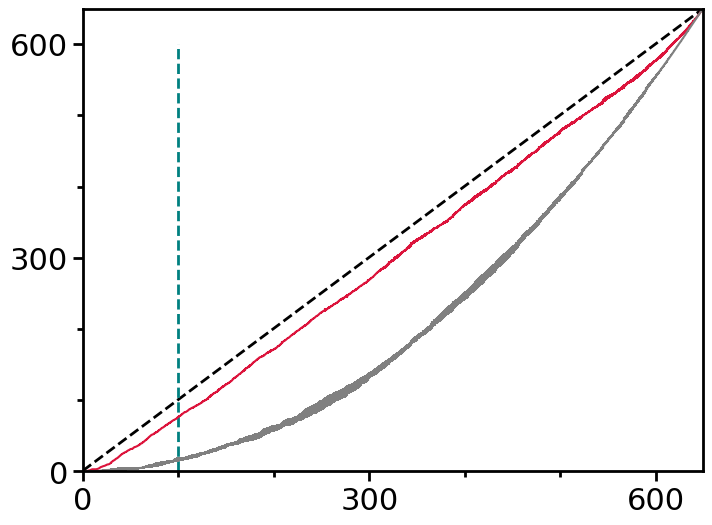

In [12]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(range(1,648), ls='--', c='black', lw=2)
ax.plot([100,100],[0,600], lw=2, ls='--', c='teal')
ax.errorbar(range(1,649), fsame[h-2][:,0], yerr=fsame[h-2][:,1], c='crimson')
ax.errorbar(range(1,649), rsame_sup[:,0], yerr=rsame_sup[:,1], c='grey')
#
ax.set_xlim(0,649)
ax.set_ylim(0,649)
ax.set_yticks([0,300,600])
ax.set_xticks([0,300,600])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/nfeatures.pdf')
plt.show()

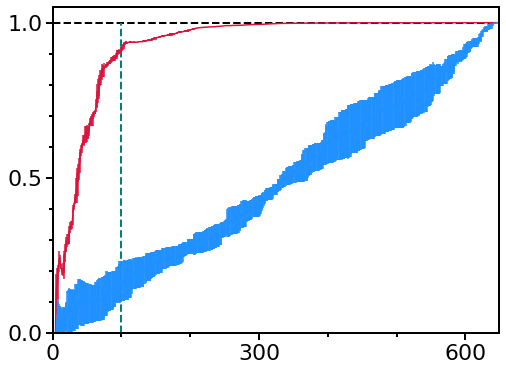

In [38]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot([1,648],[1,1], ls='--', c='black', lw=2)
ax.plot([100,100],[0,1], lw=2, ls='--', c='teal')
ax.errorbar(range(1,649), wssame[h-2][:,0], yerr=wssame[h-2][:,1], c='crimson')
ax.errorbar(range(1,649), rssame[:,0], yerr=rssame[:,1], c='dodgerblue')
#
ax.set_xlim(0,649)
ax.set_ylim(0,1.05)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,300,600])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/csupervised.pdf')
plt.show()

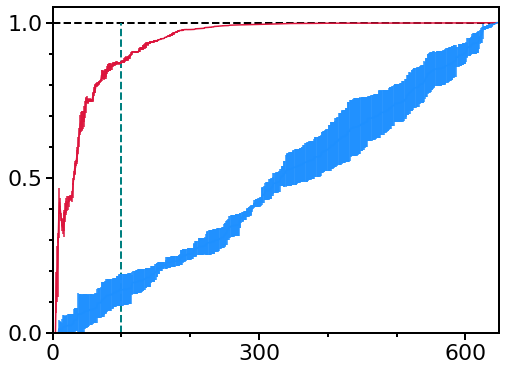

In [41]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot([1,648],[1,1], ls='--', c='black', lw=2)
ax.plot([100,100],[0,1], lw=2, ls='--', c='teal')
ax.errorbar(range(1,649), wpsame[h-2][:,0], yerr=wpsame[h-2][:,1], c='crimson')
ax.errorbar(range(1,649), rpsame[h-2][:,0], yerr=rpsame[h-2][:,1], c='dodgerblue')

ax.set_xlim(0,649)
ax.set_ylim(0,1.05)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,300,600])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/cpermute.pdf')
plt.show()

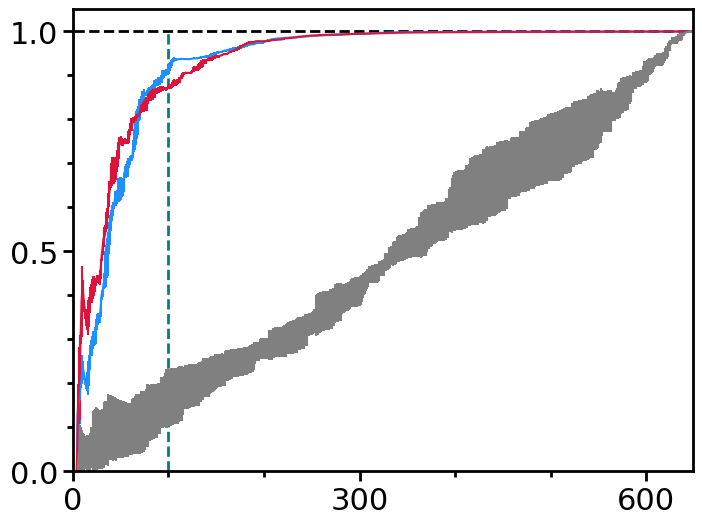

In [14]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot([1,648],[1,1], ls='--', c='black', lw=2)
ax.plot([100,100],[0,1], lw=2, ls='--', c='teal')
ax.errorbar(range(1,649), wssame[h-2][:,0], yerr=wssame[h-2][:,1], c='dodgerblue')
ax.errorbar(range(1,649), wpsame[h-2][:,0], yerr=wpsame[h-2][:,1], c='crimson')
ax.errorbar(range(1,649), rssame[:,0], yerr=rssame[:,1], c='grey')
#
ax.set_xlim(0,649)
ax.set_ylim(0,1.05)
ax.set_yticks([0,0.5,1])
ax.set_xticks([0,300,600])
ax.spines[:].set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/cboth.pdf')
plt.show()

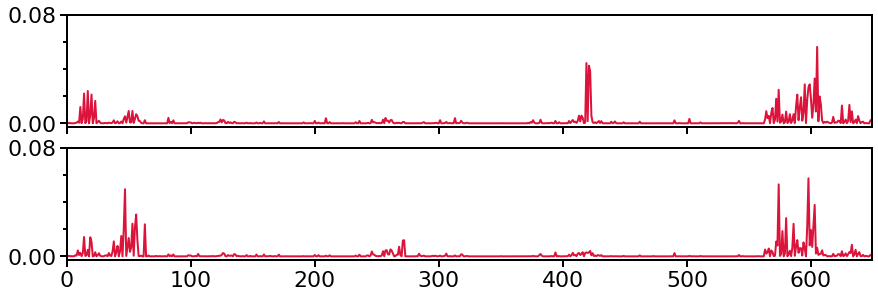

In [44]:
fig,ax=plt.subplots(2,1,figsize=(12,4), sharex=True, sharey=True)
plt.tight_layout()
h=2
ax[0].plot(range(1,649), np.mean(fsupervised, axis=0), lw=2, c='crimson')
ax[1].plot(range(1,649), np.mean(fpermute[h-2], axis=0), lw=2, c='crimson')
ax[0].set_xlim(0,649)
ax[0].set_yticks([0,0.08])
for i in range(2):
    ax[i].spines[:].set_linewidth(2)
    ax[i].tick_params(labelsize=22, length=7, width=2)
    ax[i].axes.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax[i].tick_params(length=4, width=2, which='minor')
plt.savefig('plots/fimp.pdf')
plt.show()

In [13]:
fsame[:,100]

array([[77.44      ,  1.16893114],
       [77.16      ,  1.71300905],
       [75.24      ,  1.27373467],
       [75.64      ,  1.41081537],
       [75.6       ,  1.41421356],
       [74.68      ,  1.19063009],
       [78.88      ,  1.36586969],
       [77.6       ,  1.32664992],
       [78.8       ,  1.0198039 ]])

In [14]:
rsame_sup[100]

array([17.04      ,  3.03947364])

In [15]:
wssame[:,100]

array([[0.91832118, 0.0094317 ],
       [0.89238454, 0.00680523],
       [0.88325143, 0.00647544],
       [0.88763093, 0.00680636],
       [0.88526456, 0.00388557],
       [0.8834682 , 0.00548022],
       [0.91444494, 0.00896903],
       [0.91009553, 0.00790762],
       [0.92233595, 0.00429095]])

In [16]:
wpsame[:,100]

array([[0.8743133 , 0.00523228],
       [0.87863209, 0.0070555 ],
       [0.87329292, 0.00472202],
       [0.87345256, 0.00583297],
       [0.87319818, 0.00548321],
       [0.87123302, 0.00520259],
       [0.88319815, 0.00567855],
       [0.88347239, 0.00601315],
       [0.88466592, 0.00438828]])

In [17]:
rssame[100]

array([0.16820243, 0.06559225])

In [22]:
lc=np.load('saved_urf_all/lc1.npy')
np.mean(lc,axis=1), np.std(lc, axis=1)

(array([0.99972547, 0.999797  , 0.99963777, 0.99954973, 0.9995497 ,
        0.99951959, 0.99956128, 0.99925425, 0.99943097]),
 array([4.61593168e-05, 5.81531552e-05, 9.68523029e-05, 9.09974127e-05,
        9.11681419e-05, 9.60441220e-05, 7.98348451e-05, 1.36831724e-04,
        9.82223661e-05]))

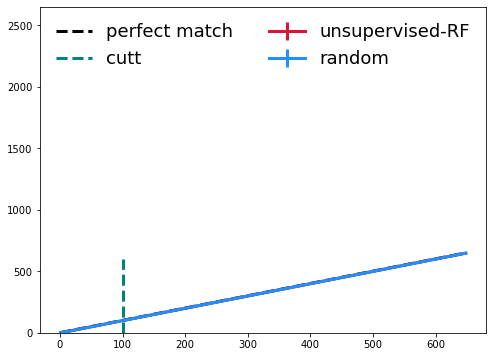

In [17]:
h=2
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(range(1,648), ls='--', c='black', lw=3, label='perfect match')
ax.plot([100,100],[0,600], lw=3, ls='--', c='teal', label='cutt')
ax.errorbar(range(1,649), range(648), yerr=np.random.normal(0,1,648), c='crimson', label='unsupervised-RF', lw=3)
ax.errorbar(range(1,649), range(648), yerr=np.random.normal(0,1,648), c='dodgerblue', label='random', lw=3)
#
leg=ax.legend(ncol=2, fontsize=18)
leg.get_frame().set_alpha(0)
#
ax.set_ylim(0,2649)
plt.savefig(f'plots/labels.pdf')
plt.show()

In [45]:
names = ['aw','bw','am','bm']
for i in names:
    globals()[f'dihedral_{i}'] = np.load(f'../../../1_datasets/mopR_ensembles/phi_psi_chi1_{i}.npy')

In [73]:
colors = ['Reds', 'Blues', 'Greens', 'Greys']

### direct

In [47]:
pic2 = [dihedral_aw, dihedral_bw, dihedral_am, dihedral_bm]
pic2 = coor.pca(pic2, dim=2).get_output()

/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


calc mean+cov:   0%|                                                                                          …

getting output of PCA:   0%|                                                                                  …

In [51]:
np.savez('saved_pca/pic2_direct_all.npz', *pic2)

In [158]:
pic2 = np.load('saved_pca/pic2_direct_all.npz')
pic2 = [pic2[i] for i in list(pic2)]

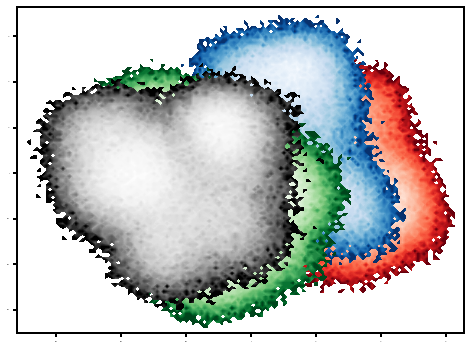

In [159]:
fig,ax=plt.subplots(1,figsize=(8,6))
for i in range(len(pic2)): 
    mplt.plot_free_energy(pic2[i][:,0], pic2[i][:,1], ax=ax, cmap=colors[i], cbar=False, alpha=1)
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=0, length=4, width=2, )
plt.savefig('plots/direct.pdf')
plt.show()

### supervised

In [79]:
i=0
fimp = np.load(f'saved_clf_all/fimp_all_{i}.npy')
fimp = fimp.argsort()[::-1][:100]
pic2 = [dihedral_aw[:,fimp], dihedral_bw[:,fimp], dihedral_am[:,fimp], dihedral_bm[:,fimp]]
pic2 = coor.pca(pic2, dim=2).get_output()
np.savez(f'saved_pca/pic2_supervised{i}_all_.npz', *pic2)

/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


calc mean+cov:   0%|                                                                                          …

getting output of PCA:   0%|                                                                                  …

In [130]:
i=0
pic2 = np.load(f'saved_pca/pic2_supervised{i}_all_.npz')
pic2 = [pic2[i] for i in list(pic2)]

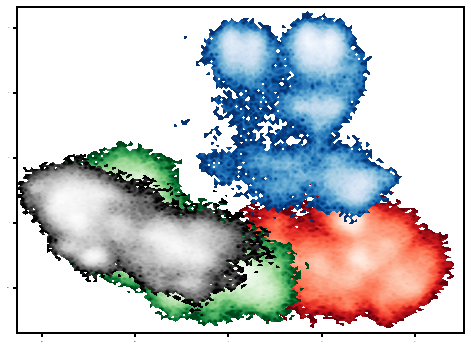

In [131]:
fig,ax=plt.subplots(1,figsize=(8,6))
for j in range(len(pic2)): 
    mplt.plot_free_energy(pic2[j][:,0], pic2[j][:,1], ax=ax, cmap=colors[j], cbar=False, alpha=1)
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=0, length=4, width=2, )
plt.savefig(f'plots/supervised_{i}.pdf')
plt.show()

### permute

In [108]:
h=2; i=4
fimp = np.load(f'saved_urf_all/fimp_hlabel{h}_{i}.npy')
fimp = fimp.argsort()[::-1][:100]
pic2 = [dihedral_aw[:,fimp], dihedral_bw[:,fimp], dihedral_am[:,fimp], dihedral_bm[:,fimp]]
pic2 = coor.pca(pic2, dim=2).get_output()
np.savez(f'saved_pca/pic2_urf{h}_{i}_all_.npz', *pic2)

/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/msahil/softwares/anaconda3/lib/python3.9/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


calc mean+cov:   0%|                                                                                          …

getting output of PCA:   0%|                                                                                  …

In [156]:
h=2 ; i=4
pic2 = np.load(f'saved_pca/pic2_urf{h}_{i}_all_.npz')
pic2 = [pic2[i] for i in list(pic2)]

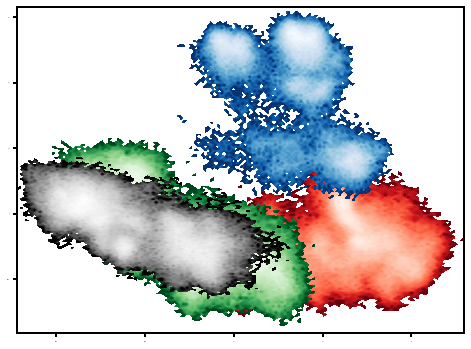

In [157]:
fig,ax=plt.subplots(1,figsize=(8,6))
for j in range(len(pic2)): 
    mplt.plot_free_energy(pic2[j][:,0], pic2[j][:,1], ax=ax, cmap=colors[j], cbar=False, alpha=1)
ax.spines[:].set_linewidth(2)
ax.tick_params(labelsize=0, length=4, width=2, )
plt.savefig(f'plots/urf{h}_{i}.pdf')
plt.show()

In [115]:
def clusters(hc,nids=range(2,11)):
    for h in nids:
        hl = extras.get_hc_dtraj(hc, nids=h)
        print(h, {i:np.where(hl==i)[0].shape[0] for i in np.unique(hl)})

In [116]:
clusters(np.load('saved_urf_all/hc_permute.npy'))

2 {0: 50036, 1: 81215}
3 {0: 50036, 1: 13567, 2: 67648}
4 {0: 50036, 1: 13567, 2: 10219, 3: 57429}
5 {0: 50036, 1: 13567, 2: 10219, 3: 49, 4: 57380}
6 {0: 50036, 1: 13567, 2: 10219, 3: 49, 4: 1, 5: 57379}
7 {0: 50036, 1: 13567, 2: 10219, 3: 49, 4: 1, 5: 8, 6: 57371}
8 {0: 13567, 1: 10219, 2: 49, 3: 1, 4: 8, 5: 57371, 6: 13713, 7: 36323}
9 {0: 13567, 1: 10219, 2: 49, 3: 1, 4: 8, 5: 57371, 6: 13713, 7: 32815, 8: 3508}
10 {0: 13567, 1: 10219, 2: 49, 3: 1, 4: 8, 5: 13713, 6: 32815, 7: 3508, 8: 22841, 9: 34530}


## residue comparison

In [12]:
res_exp = np.array([
    148, 134, 199, 166, 165, 176, 106
])

res_sim_high = np.array([
    98, 162, 112, 113, 135, 138, 111, 117, 55, 139, 157, 158, 175, 
    202, 204, 205, 206, 208, 209, 210,
    59, 147, 156
])

res_sim_low = np.array([
    86, 82, 143, 155, 159, 141, 137, 194, 
])

In [13]:
allresids = np.load('../../../1_datasets/mopR_ensembles/phi_psi_chi1_resids.npz')
allresids = [allresids[i] for i in list(allresids)]

### supervised

In [24]:
fimp = [np.load(f'saved_clf_all/fimp_all_{i}.npy') for i in range(5)]
fimp = [i.argsort()[::-1][:100] for i in fimp]
resi = np.concatenate(([allresids[i] for j in fimp for i in j]))
res_sup = {}
for i in resi:
    if i > 20:
        if i not in res_sup.keys():
            res_sup[i]=0
        res_sup[i] += 1
        
res_sup = np.array([ [i, res_sup[i]] for i in res_sup.keys() ]).astype(float)

In [25]:
mini = res_sup[:,1].min()
maxi = res_sup[:,1].max()
rmini = 0.2
rmaxi = 1
res_sup[:,1] = (res_sup[:,1] - mini)/(maxi-mini) * (rmaxi-rmini) + rmini

In [26]:
np.savetxt('important_residues_supervised_all.txt', res_sup, fmt=['%3d', '%8.4f'])

In [27]:
np.setdiff1d(res_exp, res_sup[:,0])

array([165, 166, 176])

In [28]:
np.intersect1d(res_exp, res_sup[:,0])

array([106., 134., 148., 199.])

### permute

In [29]:
h=2

In [30]:
fimp = [np.load(f'saved_urf_all/fimp_hlabel2_{i}.npy') for i in range(5)]
fimp = [i.argsort()[::-1][:100] for i in fimp]
resi = np.concatenate(([allresids[i] for j in fimp for i in j]))
res_permute = {}
for i in resi:
    if i > 20:
        if i not in res_permute.keys():
            res_permute[i]=0
        res_permute[i] += 1
        
res_permute = np.array([ [i, res_permute[i]] for i in res_permute.keys() ]).astype(float)

In [31]:
mini = res_permute[:,1].min()
maxi = res_permute[:,1].max()
rmini = 0.2
rmaxi = 1
res_permute[:,1] = (res_permute[:,1] - mini)/(maxi-mini) * (rmaxi-rmini) + rmini

In [32]:
np.savetxt('important_residues_urf_all.txt', res_permute, fmt=['%3d', '%8.4f'])

In [33]:
np.setdiff1d(res_exp, res_permute[:,0])

array([106, 165, 166, 176])

In [34]:
np.intersect1d(res_exp, res_permute[:,0])

array([134., 148., 199.])

In [38]:
np.setdiff1d(res_sup[:,0], res_permute[:,0])

array([ 30.,  31.,  43.,  69.,  72.,  82., 106., 111., 132., 142., 151.,
       152., 177., 191., 229.])

In [39]:
np.setdiff1d(res_permute[:,0], res_sup[:,0])

array([ 37.,  47.,  48.,  93.,  94.,  95.,  96.,  99., 100., 108., 150.])

In [40]:
np.intersect1d(res_sup[:,0], res_permute[:,0])

array([ 21.,  22.,  28.,  29.,  44.,  45.,  86.,  87.,  89.,  90.,  91.,
        92., 112., 113., 134., 138., 143., 144., 145., 146., 147., 148.,
       149., 173., 199., 200., 201., 202., 203., 204., 205., 206., 207.,
       208., 209., 210., 211., 212., 213., 214., 215., 216., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227.])

In [45]:
def get_res(res, resi):
    out=[]
    for i in resi:
        out.append(res[np.where(res[:,0]==i)[0][0]])
    return np.array(out)

In [46]:
np.savetxt('common_all.txt', 
           get_res(res_sup, np.intersect1d(res_sup[:,0], res_permute[:,0])),
           fmt=['%3d', '%8.4f'])
np.savetxt('supervised_all.txt', 
           get_res(res_sup, np.setdiff1d(res_sup[:,0], res_permute[:,0])),
           fmt=['%3d', '%8.4f'])
np.savetxt('permute_all.txt', 
           get_res(res_permute, np.setdiff1d(res_permute[:,0], res_sup[:,0])),
           fmt=['%3d', '%8.4f'])

## output_labels

In [6]:
from sklearn.ensemble import RandomForestClassifier as rfc
import pickle as pkl

In [7]:
urf = [pkl.load(open(f'saved_urf_all/clf_hlabel2_{i}.pkl','rb')) for i in range(5)]

In [8]:
names = ['aw','bw','am','bm']
features = [np.load(f'../../../1_datasets/mopR_ensembles/phi_psi_chi1_{i}.npy') for i in names]

In [18]:
proba = [
    np.concatenate(([
        clf.predict_proba(f)[:,1]
    for clf in urf]))
for f in features]

In [19]:
bins = np.arange(0,1.01, 0.01)
xb = bins[1:] - (bins[1]-bins[0])/2

In [20]:
hists = [
    np.histogram(i, bins=bins, density=False)[0]/i.shape[0]
for i in proba]

In [14]:
colors = ['red', 'blue', 'green', 'gray']

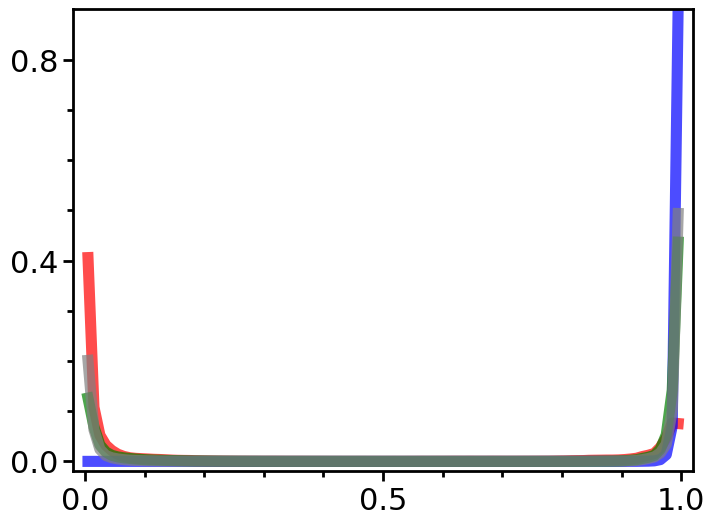

In [31]:
fig,ax=plt.subplots(figsize=(8,6))
for a, hh in enumerate(hists):
    ax.plot(xb, hh, color=colors[a], lw=8, alpha=0.7)
ax.set_xlim(-0.02,1.02)
ax.set_ylim(-0.02,0.9)
ax.set_yticks([0,0.4, 0.8])
ax.set_xticks([0,0.5,1])
for spine in ax.spines.values(): spine.set_linewidth(2)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(labelsize=22, length=7, width=2, )
ax.tick_params(which='minor', length=4, width=2)
plt.savefig(f'plots/output_labels.pdf')
plt.show()

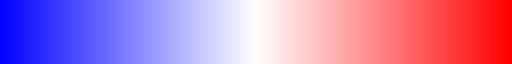

In [32]:
cm=mt.colors.LinearSegmentedColormap.from_list('',['Blue','White','Red'], N=256)
cm

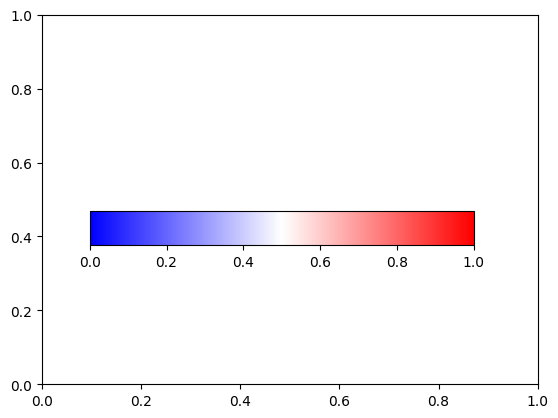

In [40]:
fig,ax=plt.subplots(1)
cax=fig.add_axes([0.2,0.4,0.6,0.07])
plt.colorbar(mappable=mt.cm.ScalarMappable(norm=mt.colors.Normalize(vmin=0,vmax=1), cmap=cm), cax=cax,
            orientation='horizontal')
plt.savefig('plots/cb.pdf')